- KNN (K-Nearest Neighbor)

In [1]:
import pandas as pd
import numpy as np
np.random.seed(5)

In [2]:
train = pd.read_csv("../Data/basketball_train.csv")
test = pd.read_csv("../Data/basketball_test.csv")

In [3]:
train.head()

,Player,Pos,3P,TRB,BLK
0,Clint Capela,C,0.0,8.1,1.2
1,Joel Embiid,C,1.2,7.8,2.5
2,J.J. Redick,SG,2.6,2.2,0.2
3,Montrezl Harrell,C,0.0,3.8,0.7
4,Nene Hilario,C,0.0,4.2,0.6


In [4]:
test.head()

,Player,Pos,3P,TRB,BLK
0,A.J. Hammons,C,0.2,1.6,0.6
1,Tarik Black,C,0.0,5.1,0.7
2,Jordan Crawford,SG,1.9,1.8,0.1
3,Dewayne Dedmon,C,0.0,6.5,0.8
4,J.R. Smith,SG,2.3,2.8,0.3


In [5]:
# 데이터 행열 개수 확인
print("train")
print(train.shape)
print("test")
print(test.shape)

train
(80, 5)
test
(20, 5)


In [6]:
# null값 확인
print(train.isnull().sum())
print(test.isnull().sum())

Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


---
### 최적의 k찾기(교차검증-cross validation)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score     # 교차검증

In [8]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습데이터의 절반까지 지정

# 절반 확인
max_k_range = train.shape[0] // 2       # // 는 정수로 나옴, /는 실수로 나옴
max_k_range

40

In [9]:
# 최적의 k를 찾기 위해 범위 확인
k_list = []

for i in range(3, max_k_range, 2):      # 2씩 증가, 홀수로 쓰는 이유??
    k_list.append(i)
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [10]:
# 점수 저장 및 Train Data 정의
cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train['Pos']

In [11]:
# 교차 검증(10-fold)[데이터를 10구간으로 나눠서 체크하기] 을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,
        x_train,
        y_train,
        cv=10, # cv: cross validation(교차검증 횟수)
        scoring='accuracy'
    )
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores

[0.9125,
 0.9,
 0.9,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.875,
 0.85,
 0.85,
 0.8375,
 0.85]

In [12]:
# 가장 예측력이 높은 k를 선정?
cvs = cross_validation_scores
k_list[cvs.index(max(cross_validation_scores))]     # k값: 9점

9

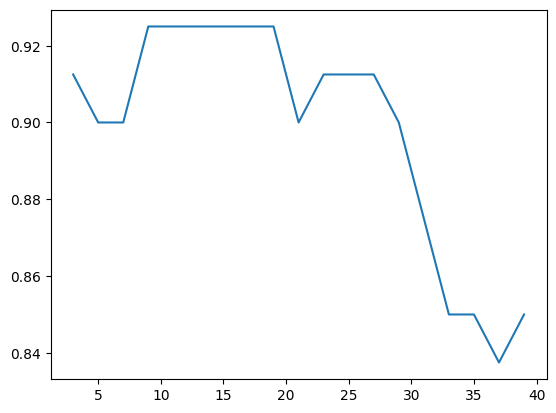

In [13]:
import matplotlib.pyplot as plt
plt.plot(k_list, cross_validation_scores)
plt.show()

---
### 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)

In [15]:
x_train = train[['3P', 'BLK']]
y_train = train['Pos']

In [16]:
x_test = test[['3P', 'BLK']]
y_test = test['Pos']

In [17]:
knn.fit(x_train, y_train)       # 학습시키기

KNeighborsClassifier(n_neighbors=3)

In [18]:
knn.score(x_test, y_test)

0.95

In [19]:
pred = knn.predict(x_test)

In [20]:
comparision = pd.DataFrame(
    {
        '예측값': pred,
        '정답': y_test
    }
)

comparision

,예측값,정답
0,C,C
1,C,C
2,SG,SG
3,C,C
4,SG,SG
5,SG,SG
6,SG,SG
7,C,SG
8,SG,SG
9,SG,SG


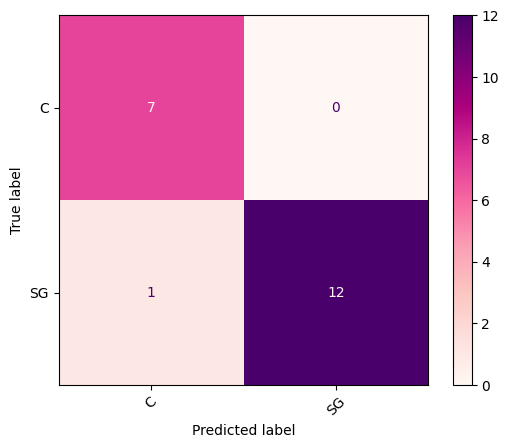

In [21]:
# 2개의 특징으로 예측하기(3점슛, 블로킹) - Confusion Maetrix
# 테이블 모양을 그림으로 그리는 거
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix1 = confusion_matrix(y_test, pred)
target_name = ["C", "SG"]
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix1,
    display_labels=target_name
)

disp.plot(
    cmap=plt.cm.RdPu,
    xticks_rotation=45
)

plt.show()

---
### 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [22]:
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train['Pos']

In [23]:
x_test = test[['3P', 'BLK', 'TRB']]
y_test = test['Pos']

In [24]:
knn.fit(x_train, y_train)       # 학습시키기
knn.score(x_test, y_test)
pred = knn.predict(x_test)

In [25]:
comparision = pd.DataFrame(
    {
        '예측값': pred,
        '정답': y_test
    }
)

comparision

,예측값,정답
0,SG,C
1,C,C
2,SG,SG
3,C,C
4,SG,SG
5,SG,SG
6,SG,SG
7,C,SG
8,SG,SG
9,SG,SG


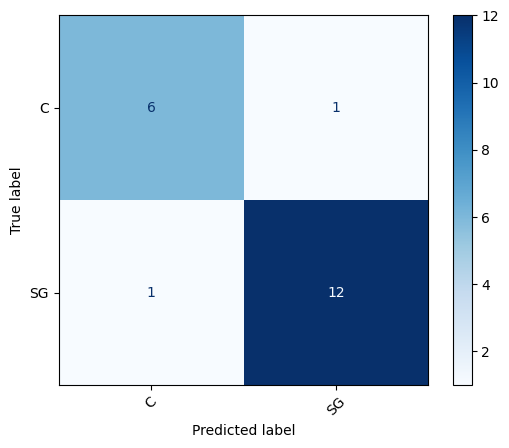

In [26]:

confusion_matrix1 = confusion_matrix(y_test, pred)
target_name = ["C", "SG"]
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix1,
    display_labels=target_name
)

disp.plot(
    cmap=plt.cm.Blues,
    xticks_rotation=45
)

plt.show()

 - 예측
3P : 3.4, BLK : 0.5, TRB : 3.7

In [27]:
new = [3.4, 0.5, 3.7]
new

pred = knn.predict([new])
pred

/Users/annakim/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['SG'], dtype=object)